# Läs in kommundata

In [2]:
from random import randint
from data_parsing import DataParser


data = DataParser()
data.laddaKommuner()
print("Slumpmässig kommun: ")
print(data.kommuner[randint(0, 289)])

Slumpmässig kommun: 
Kommunen Sunne har id 1766 och har som senast totalt 12844 människor som bodde i kommunen. Snittåldern är 48 år, samt hade år 2017 en befolkningstäthet på: 10 människor/km^2. Det bor 1393 utrikesfödda i kommunen.


# Läs in bankomatdata

In [3]:
data.laddaBankomater()

print("Slumpmässig bankomat: ")
print(data.bankomater[randint(0, len(data.bankomater) -1 )])
print("Slumpmässig transaktion")
print(data.bankomater[randint(0, len(data.bankomater) - 1)].transaktionsDataSEK[0])

Slumpmässig bankomat: 
Bankomat med id 248202, som finns på addressen Nygatan 10, i Kungsbacka kommun. Det finns 104 transaktionsadata registrerade. ÄrUte = True
Slumpmässig transaktion
{'månad': '2020M06', 'antalTransaktioner': 151, 'omsättning': 285900}


# Deskriptiv Analys

* Testar slumpmässig bankomat för brainstorming

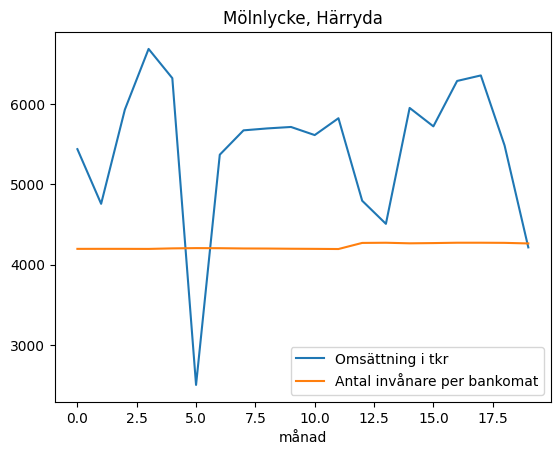

In [4]:
from analysis_models import AnalysModeller


analyser = AnalysModeller(data)

analyser.slumpmässigBankomatOmsättning()

* Testar samband mellan omsättning och befolkningstäthet

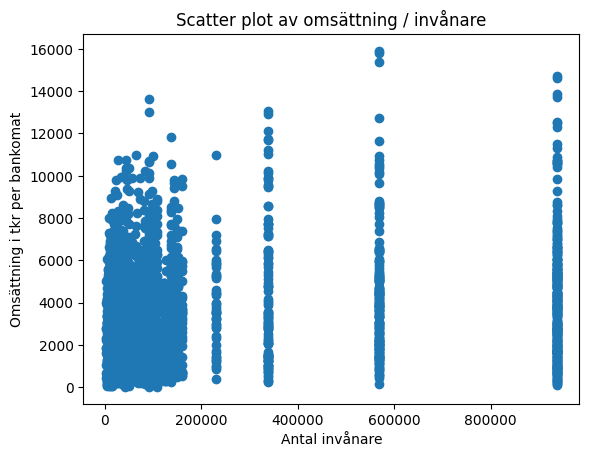

In [5]:
analyser.scatterPlotOmsättningPerInvånare()

# Ser att detta ger oss väldigt lite information. 
* Pelarna är de olika storstäderna, och där är automaterna väldigt spridda. 
* Kan vara relevant att istället kolla på omsättningen per invånare per bankomat

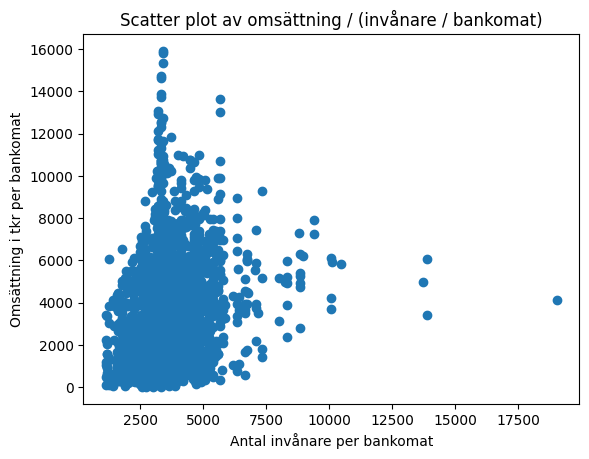

In [6]:
analyser.scatterPlotOmsättningPerInvånarePerBankomat()

# Detta ger lite mer information
* Vi ser att det inte finns ett kontinuerligt samband mellan befolkning per automat och omsättning
* När det finns för få invånare per bankomat finns det relativt liten omsättning
* När det finns för många invånare per bankomat finns det relativt liten omsättning (Vad kan det bero på?)
* I området mellan 2500 - 6000 invånare per bankomat ser vi att det finns som störst omsättning (Varför det?)

Ekerö 341.180794416061 sek/capita 134.0
Knivsta 217.67038049190666 sek/capita 71.4
Markaryd 1604.9564813859956 sek/capita 19.7
Borgholm 1535.2518786264625 sek/capita 16.0
Svalöv 362.49065693430657 sek/capita 37.4
Malmö 1404.4706590225687 sek/capita 2277.0
Dals-Ed 1416.325669642857 sek/capita 6.4
Karlsborg 1629.9025504938818 sek/capita 17.4
Gullspång 1450.1848942598187 sek/capita 16.5
Bengtsfors 1444.6974543816175 sek/capita 10.5
Åmål 1796.252666609779 sek/capita 25.4
Skara 1400.2462699077955 sek/capita 43.8
Munkfors 1539.7876480541456 sek/capita 26.1
Grums 1788.6227848101266 sek/capita 23.6
Filipstad 1470.7698090207232 sek/capita 6.7
Fagersta 1808.439471407221 sek/capita 49.6
Orsa 1444.5954381752701 sek/capita 4.0
Ockelbo 1616.6730288976098 sek/capita 5.5
Krokom 374.59672064503013 sek/capita 2.5
Bjurholm 1465.5822616407982 sek/capita 1.8
Arvidsjaur 1562.0885363357215 sek/capita 1.1


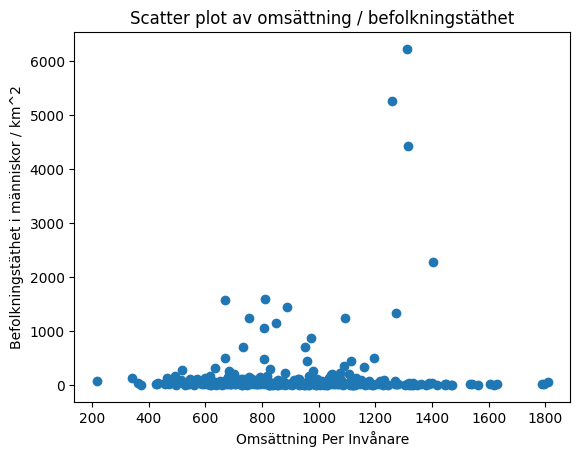

In [7]:
analyser.scatterPlotOmsättningPerInvånareMotBefolkningstäthet()

Vallentuna 8553187.5 97.4
Österåker 6566326.571428572 157.3
Värmdö 9686567.2 104.6
Järfälla 8223620.0 1588.8
Ekerö 9482779.0 134.0
Huddinge 7552007.5 875.0
Botkyrka 13573402.5 491.6
Salem 6962438.666666667 320.7
Haninge 9960184.5 214.5
Tyresö 9859894.857142856 711.4
Upplands-Bro 9360036.666666666 135.4
Nykvarn 9589738.0 76.4
Täby 6010007.111111111 1238.0
Danderyd 7626478.888888889 1239.7
Sollentuna 9917182.923076924 1449.1
Stockholm 8334583.745583039 5260.1
Södertälje 10269420.57142857 195.5
Nacka 6796331.769230769 1155.2
Sundbyberg 9586827.857142856 6229.3
Solna 7094467.4 4434.4
Lidingö 7726844.5 1578.1
Vaxholm 3220640.8 206.5
Norrtälje 6053901.166666667 32.5
Sigtuna 6578247.875 158.3
Nynäshamn 6803109.0 84.1
Håbo 7009994.333333333 158.6
Älvkarleby 9690838.0 43.4
Knivsta 8283664.0 71.4
Heby 6316574.0 12.4
Tierp 6568552.0 13.9
Uppsala 7691229.666666667 111.0
Enköping 7241947.111111111 40.6
Östhammar 5901470.25 15.2
Vingåker 5476262.0 24.3
Gnesta 6339734.5 25.2
Nyköping 5343373.33333333

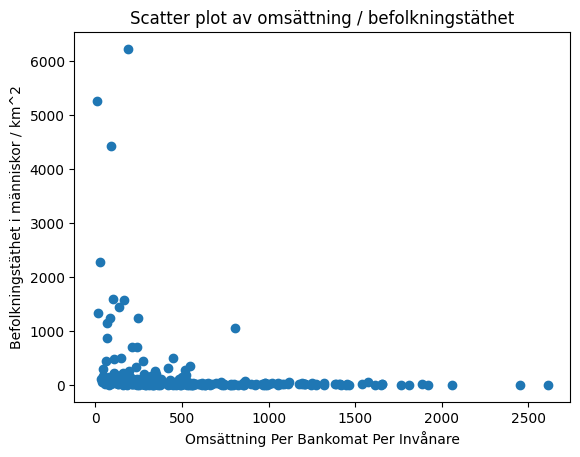

In [8]:
analyser.scatterPlotOmsättningPerAutomatMotBefolkningstäthet()

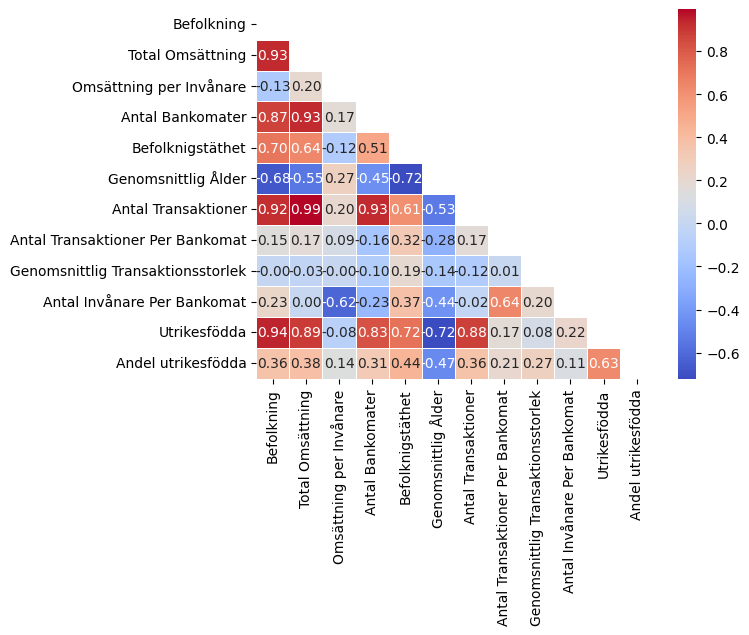

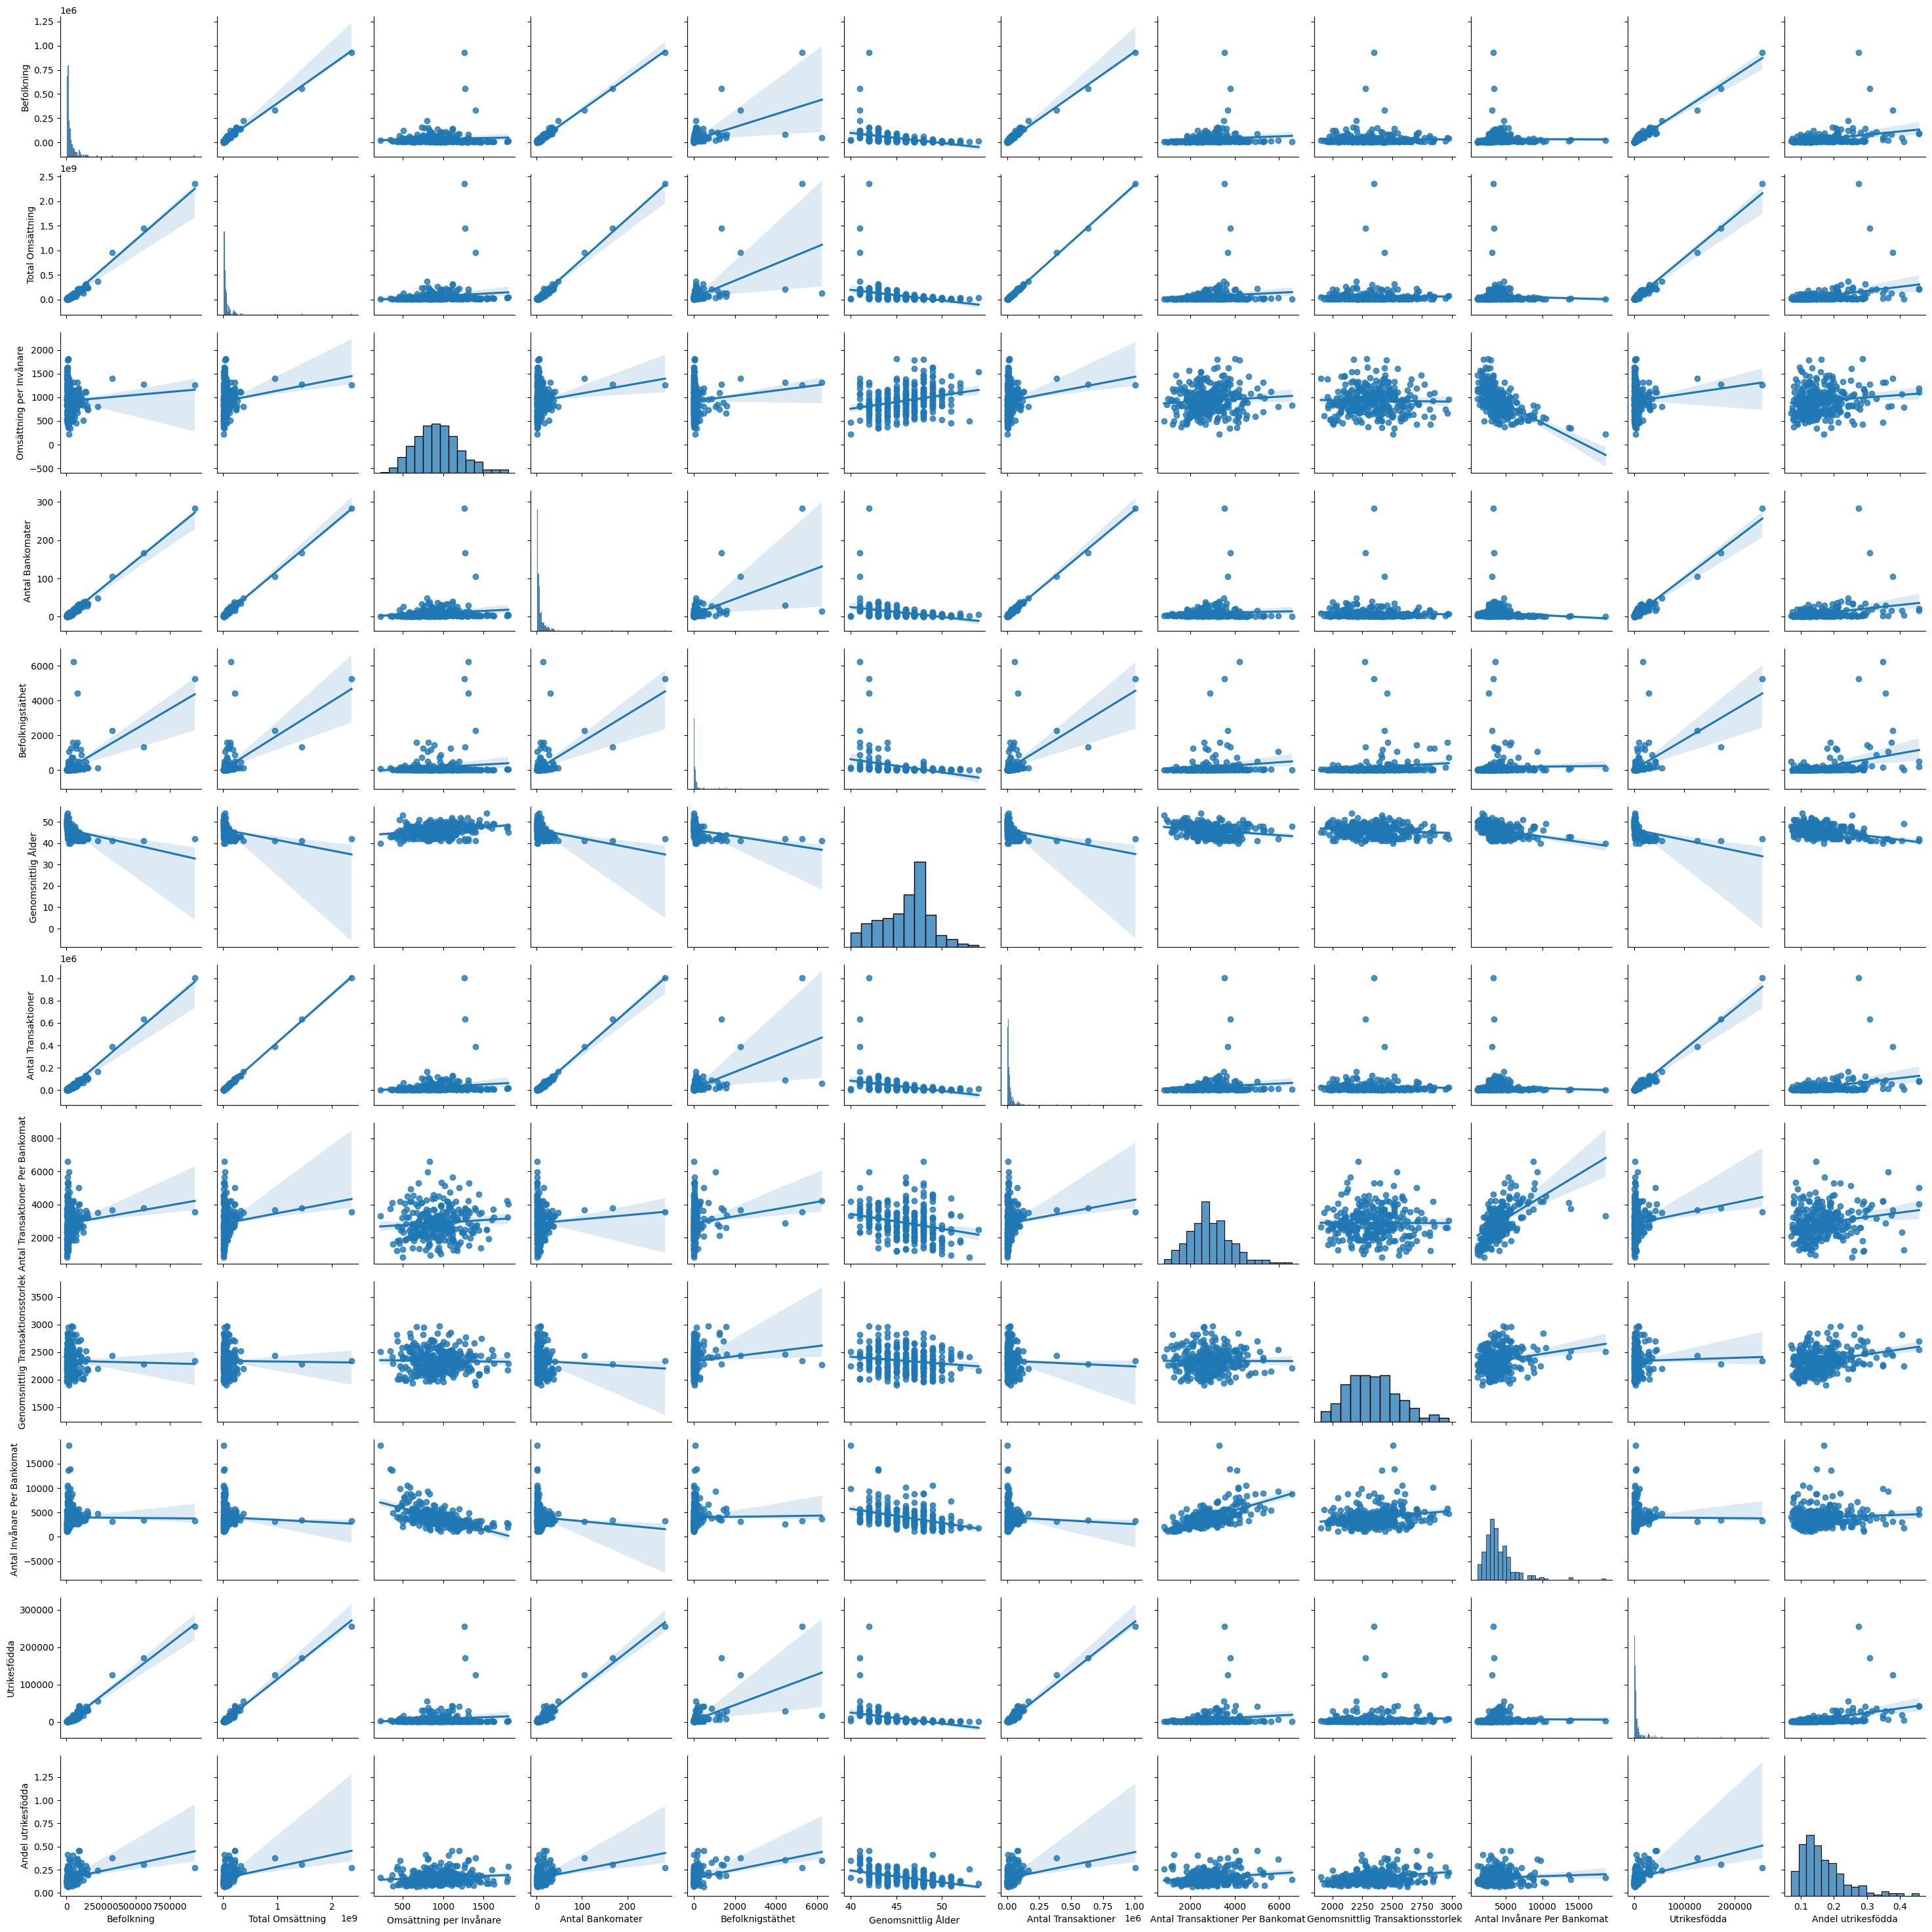

In [9]:
from collections import defaultdict
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

month = "2022M01"
year = int(month[0:4])

dataDict = defaultdict(dict)

for kommun in data.kommuner:
    try:
        namn = kommun.namn
        befolkning = kommun.data[month]["total"]
        totalOmsättning = kommun.totalOmsättning
        omsättningPerInvånare = kommun.omsättningPerInvånare
        antalBankomater = kommun.antalBankomater
        befolkningstäthet = kommun.befolkningstätheter[year]
        snittÅlder = kommun.snittÅlder
        antalTransaktioner = kommun.totalTransaktionsAntal
        antalTransaktionerPerBankomat = kommun.snittTransaktionsAntal
        genomsnittligTransaktionsStorlek = kommun.totalOmsättning / kommun.totalTransaktionsAntal 
        antalInvånarePerBankomat = befolkning / kommun.antalBankomater
        utrikesFödda = kommun.utrikesfödda[year]
        andelUtrikesfödda = utrikesFödda / befolkning
    except: 
        pass
    try:
        dataDict[namn] = {
            "Befolkning": befolkning,
            "Total Omsättning": totalOmsättning,
            "Omsättning per Invånare": omsättningPerInvånare,
            "Antal Bankomater": antalBankomater,
            "Befolknigstäthet": befolkningstäthet,
            "Genomsnittlig Ålder": snittÅlder,
            "Antal Transaktioner": antalTransaktioner,
            "Antal Transaktioner Per Bankomat": antalTransaktionerPerBankomat,
            "Genomsnittlig Transaktionsstorlek": genomsnittligTransaktionsStorlek,
            "Antal Invånare Per Bankomat": antalInvånarePerBankomat,
            "Utrikesfödda": utrikesFödda,
            "Andel utrikesfödda": andelUtrikesfödda,
        }
    except: pass

df = pd.DataFrame(dataDict)
df.to_csv("initialResults.tsv", sep="\t")


sns.heatmap(df.T.corr(method="spearman"), cmap="coolwarm", mask=np.triu(np.ones_like(df.T.corr())), annot=True, fmt=".2f", linewidths=.5)

seaborn = sns
seaborn.pairplot(data=df.T, kind="reg")
plt.show()

In [10]:
print("Spearman: ")
print(df.T.corr(method="spearman"))
print("Pearson")
print(df.T.corr(method="pearson"))

Spearman: 
                                   Befolkning  Total Omsättning   
Befolkning                           1.000000          0.928349  \
Total Omsättning                     0.928349          1.000000   
Omsättning per Invånare             -0.129150          0.199605   
Antal Bankomater                     0.869943          0.928390   
Befolknigstäthet                     0.703654          0.636016   
Genomsnittlig Ålder                 -0.680222         -0.551306   
Antal Transaktioner                  0.921840          0.994770   
Antal Transaktioner Per Bankomat     0.148101          0.166284   
Genomsnittlig Transaktionsstorlek   -0.004854         -0.026317   
Antal Invånare Per Bankomat          0.227473          0.004092   
Utrikesfödda                         0.941393          0.893399   
Andel utrikesfödda                   0.360277          0.383280   

                                   Omsättning per Invånare  Antal Bankomater   
Befolkning                           

# Mellan vilka demografier och bankomatdata ser vi samband


* Antal bankomater och total omsättning
* Antal bankomater och total befolkning
* Antal transaktioner och total befolkning
* Omsättning och total antalTransakttioner
* Antal bankomater och antal transaktioner
* Omsättning per invånare och bankomater per invåndare
* Antal transaktioner per bankomat och antal invånare per bankomat
* Omsättning per invånare och antal invånare per bankomat (Omvänt proportionella)
* Antal bankomater och befolkningstäthet
* Antal invånare per bankomat och genomsnittlig ålder (Omvänt proportionell)
* Omsättning per invånare och genomsnittlig ålder

In [11]:
print(df)

                                     Vallentuna     Österåker        Värmdö   
Befolkning                         3.266600e+04  4.587400e+04  4.405200e+04  \
Total Omsättning                   3.421275e+07  4.596429e+07  4.843284e+07   
Omsättning per Invånare            5.139673e+02  4.926082e+02  5.469547e+02   
Antal Bankomater                   4.000000e+00  7.000000e+00  5.000000e+00   
Befolknigstäthet                   9.740000e+01  1.573000e+02  1.046000e+02   
Genomsnittlig Ålder                4.200000e+01  4.300000e+01  4.300000e+01   
Antal Transaktioner                1.421800e+04  1.785500e+04  1.860300e+04   
Antal Transaktioner Per Bankomat   3.554500e+03  2.550714e+03  3.720600e+03   
Genomsnittlig Transaktionsstorlek  2.406298e+03  2.574309e+03  2.603496e+03   
Antal Invånare Per Bankomat        8.166500e+03  6.553429e+03  8.810400e+03   
Utrikesfödda                       5.673000e+03  8.695000e+03  6.473000e+03   
Andel utrikesfödda                 1.736668e-01  1.8

              index  Befolkning  Total Omsättning  Omsättning per Invånare   
0    upplands väsby         0.0               0.0                 0.000000  \
1        Vallentuna     32666.0        34212750.0               513.967341   
2         Österåker     45874.0        45964286.0               492.608201   
3            Värmdö     44052.0        48432836.0               546.954670   
4          Järfälla     78844.0       131577920.0               811.468042   
..              ...         ...               ...                      ...   
285           Luleå     75430.0       113459132.0               747.366032   
286           Piteå     40528.0        63570564.0               784.124778   
287           Boden     26945.0        30150758.0               561.424810   
288       Haparanda      9147.0        14117982.0               783.201043   
289          Kiruna     21561.0        43589008.0              1017.198917   

     Antal Bankomater  Befolknigstäthet  Genomsnittlig Ålder   

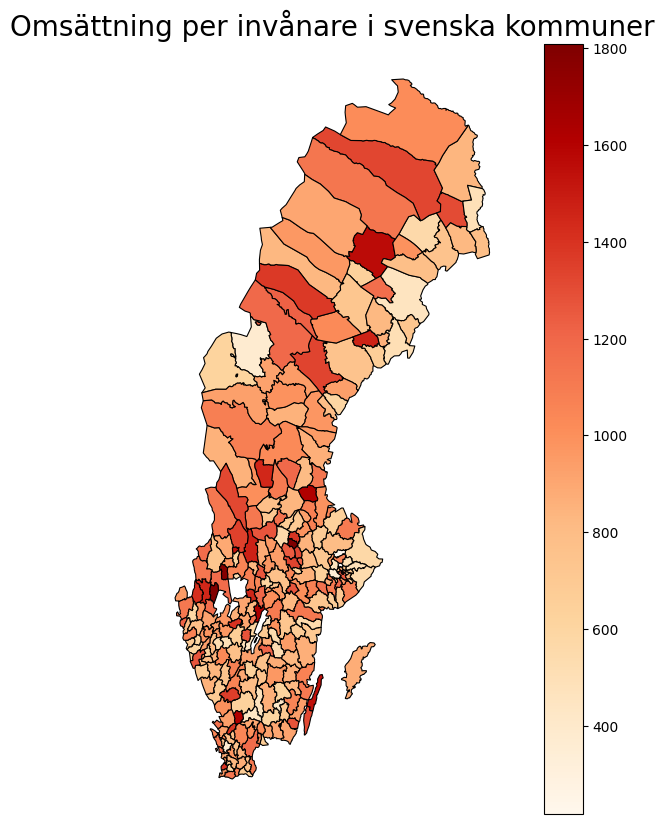

In [12]:

import geopandas as gpd
import matplotlib.pyplot as plt

# Read GeoJSON file into a GeoDataFrame
sweden = gpd.read_file("swedish_municipalities.geojson")

# Transpose the DataFrame and reset the index
df_T = df.T.reset_index()


# Create a new DataFrame with a single row containing the desired values
new_row = pd.DataFrame({'index': ['upplands väsby'], **{col: [0] for col in df_T.columns[1:]}})

# Concatenate the original DataFrame and the new row
df_T = pd.concat([new_row, df_T], ignore_index=True)

print(df_T)

# Merge the two DataFrames based on the municipality name
merged = sweden.merge(df_T, left_on='kom_namn', right_on='index')

print(merged)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the heatmap
merged.plot(column='Omsättning per Invånare', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='black', legend=True)

# Add a title
ax.set_title('Omsättning per invånare i svenska kommuner', fontdict={'fontsize': 20})

# Remove the axis
ax.axis('off')

# Show the plot
plt.show()



In [13]:
import plotly.express as px
import plotly.graph_objs as go

# Create a choropleth map with Plotly
lukas = "Befolkning"
fig = px.choropleth_mapbox(merged,
                           geojson=merged.geometry,
                           locations=merged.index,
                           color= lukas,
                           color_continuous_scale='OrRd',
                           opacity=0.8,
                           mapbox_style='carto-positron',
                           center={'lat': 63.0, 'lon': 16.0},
                           zoom=4,
                           hover_name='kom_namn')


# Update the map layout
fig.update_layout(title= lukas + ' i svenska kommuner', title_font_size=24, margin=dict(l=0, r=0, t=50, b=0))

# Show the plot
fig.show()

In [14]:
from scipy.stats import f_oneway

# Create a DataFrame with three groups of data


# Run the ANOVA analysis
f_value, p_value = f_oneway(*df["Omsättning per Invånare"])

# Print the results
print('F-value:', f_value)
print('P-value:', p_value)

KeyError: 'Omsättning per Invånare'

In [ ]:
import statsmodels.api as sm
X = df_T[['Genomsnittlig Ålder', 'Befolkning', 'Antal Invånare Per Bankomat']]
Y = df_T['Total Omsättning']

# Add a constant term to the predictor variables
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(Y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Total Omsättning   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     3744.
Date:                Fri, 05 May 2023   Prob (F-statistic):          4.10e-229
Time:                        10:39:24   Log-Likelihood:                -5382.0
No. Observations:                 290   AIC:                         1.077e+04
Df Residuals:                     286   BIC:                         1.079e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [5e-08 0.99999995]
-----------------------------------------------------------------------------------------------
const             

In [50]:
def dataframe(month):
    year = int(month[0:4])
    dataDict = defaultdict(dict)

    for kommun in data.kommuner:
        try:
            namn = kommun.namn
            befolkning = kommun.data[month]["total"]
            totalOmsättning = kommun.totalOmsättning
            omsättningPerInvånare = kommun.omsättningPerInvånare
            antalBankomater = kommun.antalBankomater
            befolkningstäthet = kommun.befolkningstätheter[year]
            snittÅlder = kommun.snittÅlder
            antalTransaktioner = kommun.totalTransaktionsAntal
            antalTransaktionerPerBankomat = kommun.snittTransaktionsAntal
            genomsnittligTransaktionsStorlek = kommun.totalOmsättning / kommun.totalTransaktionsAntal 
            antalInvånarePerBankomat = befolkning / kommun.antalBankomater
            utrikesFödda = kommun.utrikesfödda[year]
            andelUtrikesfödda = utrikesFödda / befolkning
            dataDict[namn] = {
                "Date" : month,
                "Befolkning": befolkning,
                "Total Omsättning": totalOmsättning,
                "Omsättning per Invånare": omsättningPerInvånare,
                "Antal Bankomater": antalBankomater,
                "Befolknigstäthet": befolkningstäthet,
                "Genomsnittlig Ålder": snittÅlder,
                "Antal Transaktioner": antalTransaktioner,
                "Antal Transaktioner Per Bankomat": antalTransaktionerPerBankomat,
                "Genomsnittlig Transaktionsstorlek": genomsnittligTransaktionsStorlek,
                "Antal Invånare Per Bankomat": antalInvånarePerBankomat,
                "Utrikesfödda": utrikesFödda,
                "Andel utrikesfödda": andelUtrikesfödda,
            }
        except: 
            pass

    daf = pd.DataFrame(dataDict)

    return daf


daf = dataframe("2014M01")
for month in data.kommuner[0].data.keys():
    if month != "total" and month != "2014M01": 
        new_df = dataframe(month)
        daf = pd.concat([daf, new_df], axis=1)

daf = daf.T
daf = daf.drop('Date', axis=1)
print(daf)

dict_keys(['2014M01', '2014M02', '2014M03', '2014M04', '2014M05', '2014M06', '2014M07', '2014M08', '2014M09', '2014M10', '2014M11', '2014M12', '2015M01', '2015M02', '2015M03', '2015M04', '2015M05', '2015M06', '2015M07', '2015M08', '2015M09', '2015M10', '2015M11', '2015M12', '2016M01', '2016M02', '2016M03', '2016M04', '2016M05', '2016M06', '2016M07', '2016M08', '2016M09', '2016M10', '2016M11', '2016M12', '2017M01', '2017M02', '2017M03', '2017M04', '2017M05', '2017M06', '2017M07', '2017M08', '2017M09', '2017M10', '2017M11', '2017M12', '2018M01', '2018M02', '2018M03', '2018M04', '2018M05', '2018M06', '2018M07', '2018M08', '2018M09', '2018M10', '2018M11', '2018M12', '2019M01', '2019M02', '2019M03', '2019M04', '2019M05', '2019M06', '2019M07', '2019M08', '2019M09', '2019M10', '2019M11', '2019M12', '2020M01', '2020M02', '2020M03', '2020M04', '2020M05', '2020M06', '2020M07', '2020M08', '2020M09', '2020M10', '2020M11', '2020M12', '2021M01', '2021M02', '2021M03', '2021M04', '2021M05', '2021M06',

In [48]:
import statsmodels.api as sm
X = daf[['Genomsnittlig Ålder', 'Befolkning', 'Antal Invånare Per Bankomat']]
Y = daf['Total Omsättning']

# Add a constant term to the predictor variables
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(Y, X).fit()

# Print the model summary
print(model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereNone and const                          float64
Genomsnittlig Ålder             object
Befolkning                      object
Antal Invånare Per Bankomat     object
dtype: object. The data was
Vallentuna     34212750
Österåker      45964286
Värmdö         48432836
Järfälla      131577920
Ekerö          18965558
                ...    
Luleå         113459132
Piteå          63570564
Boden          30150758
Haparanda      14117982
Kiruna         43589008
Name: Total Omsättning, Length: 31212, dtype: object
and
             const Genomsnittlig Ålder Befolkning Antal Invånare Per Bankomat
Vallentuna    1.0                  42      29765                     7441.25
Österåker     1.0                  43      38456                 5493.714286
Värmdö        1.0                  43      37770                      7554.0
Järfälla      1.0                  41      65447                   4090.4375
Ekerö         1.0                  43      24974                     12487.0
...           ...                 ...        ...                         ...
Luleå         1.0                  44      75272                 3421.454545
Piteå         1.0                  46      40203                     3350.25
Boden         1.0                  47      26631                 3804.428571
Haparanda     1.0                  49       8956                      1791.2
Kiruna        1.0                  45      21200                 1927.272727

[31212 rows x 4 columns]
before. After,
[34212750 45964286 48432836 ... 30150758 14117982 43589008]
[[1.0 42 29765 7441.25]
 [1.0 43 38456 5493.714285714285]
 [1.0 43 37770 7554.0]
 ...
 [1.0 47 26631 3804.4285714285716]
 [1.0 49 8956 1791.2]
 [1.0 45 21200 1927.2727272727273]].